# Lab 3: Machine Learning

This lab will introduce some common Machine Learning terms and techniques. When we talk about Deep Learning, we indicate a set of tools and techniques in Machine Learning that involve artificial Neural Networks.

![Deep Learning is a branch of Artificial Intelligence](./assets/ai_ml_dl.png)

Since for the rest of the labs we will use terms like `train_test_split` or `cross_validation` it makes sense to introduce these first and then explain Deep Learning.

## The purpose of Machine Learning

Machine Learning is a branch of Artificial Intelligence that develops computer programs that can learn patterns and rules from data. Although its origins can be traced back to the early days of modern computer science, only in the last decade has Machine Learning become a **fundamental tool for companies in all industries**. 

Product recommendation, advertisement optimization, machine translation, image recognition, self-driving cars, spam and fraud detection, automated medical diagnoses: these are just a few examples of how **Machine Learning is omnipresent in business and life**.

This revolution has mostly been possible thanks to the combination of **3 factors**:

* cheap and powerful memory storage
* cheap and powerful computing power
* explosion of data collected by mobile phones, web apps, and sensors

![3 Enablers of the Machine Learning revolution](./assets/ml_3_factors.png)

These same **3 factors are enabling the current Deep Learning and AI revolution**. Deep Neural Networks have been around for quite a while, but it wasn't until relatively recently that we've powerful enough computers (and large enough datasets) to make good use of them. Things changed in the last few years, and many companies that used other Machine Learning techniques are now switching to Deep Learning.

Before we start studying Neural Networks, we need to make sure to have a **shared understanding of Machine Learning**, so this lab is a quick summary of its central concepts. 

If you are already familiar with terms like Regression, Classification, Cross-Validation and Confusion matrix, you may want to skim through this section quickly. However, make sure you understand **cost functions** and **parameter optimization** as they are fundamental for everything that will follow!

## Different types of learning

There are **several types of Machine Learning**, including:

- Supervised Learning
- Unsupervised Learning
- reinforcement learning

![Different types of learning](./assets/types_of_learning.png)


While this course will primarily focus on **supervised learning**, it is essential to understand the difference in each of the types.

**In Supervised Learning an algorithm learns from labeled data.** For example, let's say we are training an image recognition algorithm to distinguish cats from dogs: each **training** datapoint will be the pair of an image (training data) and a label, which specifies if the image is a cat or a dog. Similarly, if we are training a translation engine, we will provide both input and output sentences, asking the algorithm to learn the function that connects them.

Conversely, **in Unsupervised Learning, data comes without labels**, and the task is to find similar data points in the dataset, to identify any underlying higher-order structure. For example, in a dataset containing the purchase preferences of e-commerce users, these users will likely form clusters with similar purchase behavior regarding amount spent or objects bought. We can think of these as different "tribes" with different preferences. Once we identify these tribes, we can describe each data point (that is, each user) referring to the tribe it belongs to, gaining a deeper understanding of the data.

Finally, **reinforcement learning** is similar to Supervised Learning, but in this case **the algorithm is training an agent to act in an environment**. The actions of the agent lead to outcomes that are attached to a score, and the algorithm tries to maximize such score. Typical examples here are algorithms that learn to play games, like Chess or Go. The main difference with Supervised Learning is that the score is that the algorithm does not receive a label (score) for each action it takes. Instead, it needs to perform a sequence of steps before it knows if that leads to a higher score.

In 2016 a software trained with reinforcement learning beat the world Go champion, marking a new milestone in the race towards artificial intelligence.

## Supervised Learning

Let's dive into Supervised Learning by first reviewing some of its successful applications. Have you ever noticed that email spam is practically non-existent any longer? This thought is thanks to Supervised Learning. 

In the early 2000s, e-mailboxes received tons of emails advertising pills, money making schemes and other crappy information. The first step to get rid of these was to allow users to move spam emails into a *spam* folder, which provided the training labels. With millions of users manually cataloging spam, large email providers like Google and Yahoo could quickly gather enough examples of what a spam mail looked like to train a model that would predict the probability for a message to be spam.

This technique is called a **binary classifier**, and it is a **Machine Learning algorithm that learns to distinguish between 2 classes**, like true or false, spam or not spam, positive or negative sentiment, dead or alive.

Binary classifiers trained with Supervised Learning are ubiquitous. Telecom companies use them to predict if a user is about to churn and go to a competitor, so they know when and to whom to make an offer to retain them.

Social media analytics companies use binary classifiers to judge the prevailing sentiment on their clients' pages. If you are a celebrity, you receive millions of comments each time you post something on Facebook or Twitter. How can you know if your followers were prevalently happy or angry at what you tweeted? A sentiment analysis classifier can distinguish that for every single comment, and therefore give us the overall reaction by aggregating over all observations.

![Sentiment of a text sentence](./assets/sentiment.png)

**Supervised learning is also used to predict continuous quantities**, for example, to forecast retail sales of next month or to predict how many cars there will be at a particular intersection to offer a better route for car navigation. In this case, the labels are not discrete like "true/false" or "black/blue/green" but they have continuous values, like 68, 73, 71 if we're trying to predict temperature.

What other examples of Supervised Learning can you think of?

## Configuration File

As promised in earlier lab, from this lab onwards we'll bundle common packages and configurations in a single config file that we load at the beginning of the lab. Let's go ahead and load it:

In [1]:
with open('common.py') as fin:
    msg = fin.read()

Let's take a look at its content:

In [2]:
print(msg)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import seaborn here because otherwise it will mess up warnings
import seaborn as sns
import warnings
import logging

# https://github.com/tensorflow/tensorflow/issues/8340#issuecomment-332212742
# disabling tensorflow warnings, feel free to uncomment out the next 2 lines if you want to suppress warnings
logging.getLogger("tensorflow").disabled = True
warnings.simplefilter("ignore")

pd.set_option("display.max_rows", 13)
pd.set_option('display.max_columns', 8)
pd.set_option("display.latex.repr", False)
pd.set_option('max_colwidth', 30)



To execute this file we use the `exec` function:

In [3]:
exec(msg)

We have now loaded `pyplot`, `pandas` and `numpy` and we have set a few configuration parameters. Let's also load the configuration for matploltib. For some reason this must be executed in a separate cell or it won't work:

In [4]:
with open('matplotlibconf.py') as fin:
    exec(fin.read())

We are ready to roll!

## Linear Regression

Let's take a second look at the plot we drew in Exercise 2 of Section 2. As we know by now, it represents a population of individuals. Each dot is a person, and the position of the dot on the chart is defined by two coordinates: weight and height. Let's plot it again:

In [5]:
df = pd.read_csv('../data/weight-height.csv')

In [6]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


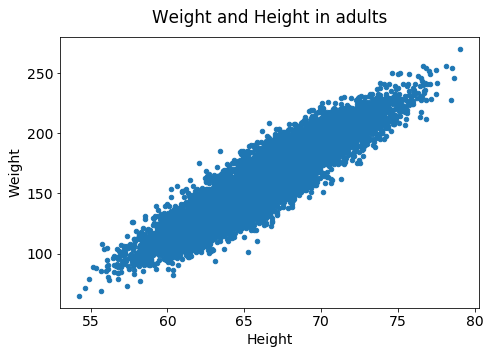

In [7]:
def plot_humans():
    df.plot(kind='scatter',
            x='Height',
            y='Weight',
            title='Weight and Height in adults')

plot_humans()

Can we tell if there is a pattern in how the dots are laid out on the graph or do they seem completely randomly spread? Our visual cortex, a great pattern recognizer, tells us that there is a pattern: dots are roughly spread around a straight diagonal line. This line seems to indicate the obvious: taller people are also heavier on average.

Let's sketch a line to represent this relationship. We can plot this line "by hand", without any learning, by choosing the values of the two extremities. For example, let's draw a segment that starts at the point $[55, 78]$ and ends at the point $[75, 250]$.

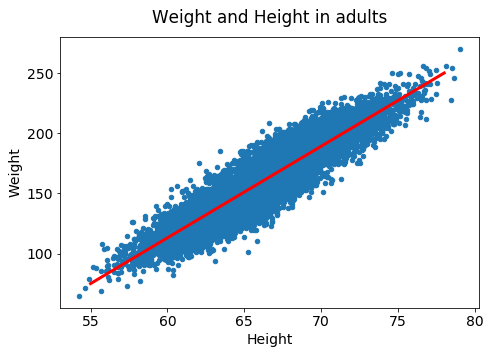

In [8]:
plot_humans()

# Here we plot the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3);

Can we specify this relationship more precisely? Instead of guessing the position of the line, can we ask an algorithm to find the best possible line to describe our data? The answer is yes! Let's see how.

We are saying that **weight (our target or label) is a linear function of height (our only feature)**.

Let's assign variable names to our quantities. As we saw in the introduction, it is common to use the letter $y$ to the labels (people's weight in this case) and the letter $X$ to the input features (only height in this case).

You may remember from high school math that an equation can describe a line in a 2D-space. Indicating the input as $X$  (horizontal axis) and the outputs as $y$ (vertical axis) we need only two parameters. One parameter controls the point where the line crosses the vertical axis, the other controls the slope of the line. We can write the equation of a line in a 2D plane as:

\begin{equation}
\hat{y} = b + X w
\end{equation}

where $\hat{y}$ is pronounced y-hat. Let's first convince ourselves that this indicates any possible line in the 2D plane (except for a perfectly vertical line).

If we choose $b=0$ and $w=0$, we obtain the equation $\hat{y} = 0$ for any value of $X$, which is the set of points that form the horizontal line passing through zero.

If we start changing $b$, we will obtain $\hat{y} = b$, which is still a horizontal line, passing through the constant point $b$. Finally, if we also change $w$, the line will start to be inclined in some way.

So yes, any line in the 2D-plane, except for a vertical line, will have its unique values for $w$  and $b$.

To find a linear relation between $X$ and $y$ means to describe our labels $y$ as a linear function of $X$ plus some small correction $\epsilon$:

\begin{equation}
y = b + X w + \epsilon = \hat{y} + \epsilon
\end{equation}

It's good to get used to distinguishing between the values of the output ($y$, our labels) and the values of the predictions ($\hat{y}$).

### Let's draw some examples.

In this lab, we are going to explain how an algorithm can find the perfect line to fit a dataset. Before writing an algorithm, it's helpful to understand the dynamics of this line formula. So what we're going to do is draw a few plots where we change the values of $b$ and $w$ and see how they affect the position of the line in the 2D plane. This will give us better insight when we try to automate this process.

Let's start by defining a simple line function:

In [9]:
def line(x, w=0, b=0):
    return x * w + b

Then let's create an array of equally spaced $x$ values between 55 and 80 (these are going to be the values of height):

In [10]:
x = np.linspace(55, 80, 101)
x

array([55.  , 55.25, 55.5 , 55.75, 56.  , 56.25, 56.5 , 56.75, 57.  ,
       57.25, 57.5 , 57.75, 58.  , 58.25, 58.5 , 58.75, 59.  , 59.25,
       59.5 , 59.75, 60.  , 60.25, 60.5 , 60.75, 61.  , 61.25, 61.5 ,
       61.75, 62.  , 62.25, 62.5 , 62.75, 63.  , 63.25, 63.5 , 63.75,
       64.  , 64.25, 64.5 , 64.75, 65.  , 65.25, 65.5 , 65.75, 66.  ,
       66.25, 66.5 , 66.75, 67.  , 67.25, 67.5 , 67.75, 68.  , 68.25,
       68.5 , 68.75, 69.  , 69.25, 69.5 , 69.75, 70.  , 70.25, 70.5 ,
       70.75, 71.  , 71.25, 71.5 , 71.75, 72.  , 72.25, 72.5 , 72.75,
       73.  , 73.25, 73.5 , 73.75, 74.  , 74.25, 74.5 , 74.75, 75.  ,
       75.25, 75.5 , 75.75, 76.  , 76.25, 76.5 , 76.75, 77.  , 77.25,
       77.5 , 77.75, 78.  , 78.25, 78.5 , 78.75, 79.  , 79.25, 79.5 ,
       79.75, 80.  ])

And let's pass these values to the line function and calculate $\hat{y}$. Since both $w$ and $b$ are zero, we expect $\hat{y}$ to also be zero:

In [11]:
yhat = line(x, w=0, b=0)
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

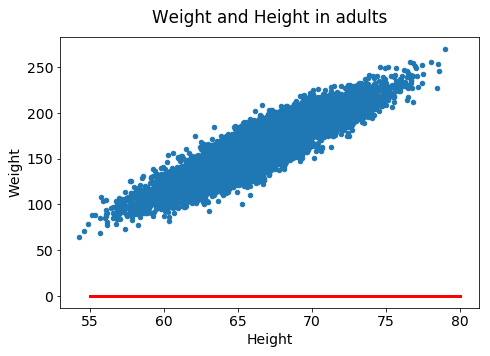

In [12]:
plot_humans()

plt.plot(x, yhat, color='red', linewidth=3);

So we've drawn a horizontal line as our model. This is not really a good model for our data! It would be a good model if everyone in our population was floating in space and therefore measured 0 weight regardless of their height. Fun, but not accurate for our chart! See how far the line is from our data.

If we let _b_ vary, the horizontal line starts to move up or down, indicating constant weight _b_, regardless of the value of $x$ (the height).

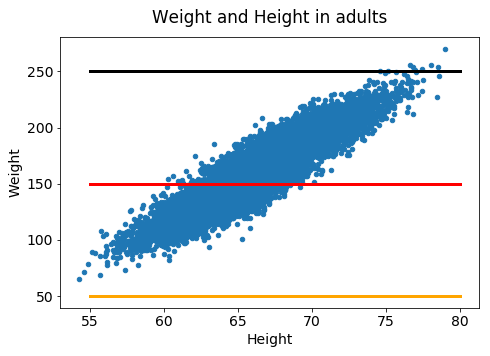

In [13]:
plot_humans()

# three settings for b "offset" the 
plt.plot(x, line(x, b=50), color='orange', linewidth=3)
plt.plot(x, line(x, b=150), color='red', linewidth=3)
plt.plot(x, line(x, b=250), color='black', linewidth=3);

This would be a good model only if we had a broken scale that always returned a fixed value, regardless of who steps on it. Also not accurate.

Finally, if we vary _w_, the line starts to tilt, with _w_ indicating the _increment in weight_ corresponding to the increment in 1 unit of height. For example, if _w_=1, that would imply that **1 pound is gained for each inch of height**.

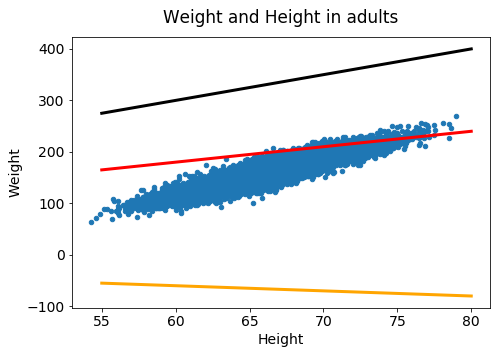

In [14]:
plot_humans()

plt.plot(x, line(x, w=5), color='black', linewidth=3)
plt.plot(x, line(x, w=3), color='red', linewidth=3)
plt.plot(x, line(x, w=-1), color='orange', linewidth=3);

So, to recap, we started from the intuitive observation that taller people are heavier and we decided to look for a line function to predict the weight of a person as a function of the height.

Then we observed that any line in the 2D plane needs the definition of two parameters: $b$ and $w$. We plotted a few such lines and compared them with our data. Now we need to find the values of such parameters that correspond to the best line for our data.

### Cost Function

To find the best possible linear model to describe our data, we need to define a criterion to evaluate the "goodness" of a particular model.

In Supervised Learning **we know the values of the labels**. So we can **compare the value predicted** by the hypothesis with **the actual value of the label** and calculate the error for each data point:

\begin{equation}
\epsilon_i = y_i - \hat{y}_i
\end{equation}

Remember that $y_i$ is the actual value of the output while $\hat{y}_i$ is our prediction. Also, notice that we used a subscript index $i$ to indicate the $i$-th data point. Each data point difference is a residual, and the group of them together are the *residuals*.

Note that in this definition, a residual carries a sign, it will be positive if our hypothesis underestimates the actual weight and negative if it overestimates it.

![Residuals](./assets/residual.png)

Since we don't really care about the direction in which our hypothesis is wrong (we only care about the total amount of being wrong), we can define the _total error_ as the sum of the absolute values of the residuals:

\begin{equation}
\textrm{Total Error} = \sum_i | \epsilon_i | = \sum_i |y_i - \hat{y}_i |
\end{equation}

The **total error** is one possible example of what's called a **cost function**. We have associated a well-defined cost that we can calculate from features and labels through the use of our hypothesis $\hat{y} = h(x)$.

For reasons that will be apparent later, it is often preferable to use another cost function called **Mean Squared Error**. This is defined as:

\begin{equation}
\textrm{MSE}= \frac{1}{N} \sum_i (y_i - \hat{y}_i)^2
\end{equation}

where $N$ is the number of data points used to train our model.

Notice that since the square is a positive function, the MSE will be big when the total error is big and small when the total error is small, so they are equivalent. However, the *Mean Squared Error* (or MSE, for short) is preferred because it is smooth and guaranteed to have a global minimum, which is what we are going to look for.

### Finding the best model

Now that we have both a hypothesis (linear model) and a cost function (mean squared error), we need to find the combination of parameters _b_ and _w_ that **minimizes such cost**. 

Remember, that **cost** is another way to say the 'error amount' of our prediction - we're assigning a number to how wrong our prediction is. We want to _minimize_ this error (cost) because if it was zero, that means we predicted correctly.

Let's first define a helper function to calculate the MSE and then evaluate the cost for a few lines:

In [15]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

Let's also define inputs and outputs for our data. Our input is the height column. We will assign it to the variable $X$:

In [16]:
X = df[['Height']].values
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

Notice that $X$ is matrix with 10000 rows and a single column:

In [17]:
X.shape

(10000, 1)

This format will allow us to extend the linear regression to cases where we want to use more than one column as input.

Then let's define the outputs:

In [18]:
y_true = df['Weight'].values
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

The outputs are a single array of values. What is the cost going to be for the horizontal line passing through zero? We can calculate it as follows.

First we generate predictions for each value of $X$:

In [19]:
y_pred = line(X)
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

And then we calculate the cost, i.e. the mean squared error between these predictions and our true values:

In [20]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

Notice that we flattened out the predictions so that it has the same shape as the output vector.

The cost is above 27,000. What does it mean? Is it bad? Is it good? It's hard to say because we don't have anything to compare it to. Different datasets will have very different numbers here depending on the units of measure of the quantity we are predicting. So the value of the cost has very little meaning by itself. What we need to do is compare this cost with that of another choice of $b$ and $w$. Let's increase w a little bit:

In [21]:
y_pred = line(X, w=2)
mean_squared_error(y_true, y_pred.ravel())

1457.1224504786412

The total MSE decreased from over 27000 to below 2000, which is good. It means our new hypothesis with `w=2` is less-wrong than using `w=0`.

Let's see what happens if we also change $b$:

In [22]:
y_pred = line(X, w=2, b=20)
mean_squared_error(y_true, y_pred.ravel())

708.9129575511095

Even better! As you can see, we can keep changing $b$ and $w$ by small amounts, and the value of the cost will keep changing.

Of course, it's going to take forever for us to find the best combination if we sit here and tweak numbers until we see the best ones. A better way would be if we could write a program that would test all possible values for us and then only report to us the result.

Before we do that, let's check a couple of other combinations of $w$ and $b$. Let's try to keep $w$ fixed and vary only $b$.

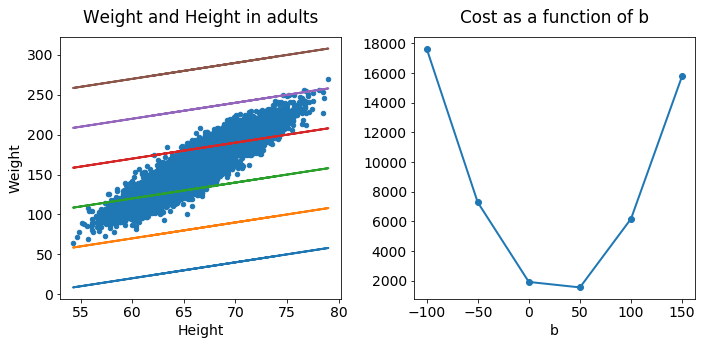

In [23]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a 
# few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])

mses = []  # append the values of the cost here
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')
plt.tight_layout();

When $w=2$, the cost as a function of $b$ has a minimum value somewhere near 50.

The same would be true if we let $w$ vary, there will be a value of $w$ for which the cost is minimum. Since we choose a cost function that is _quadratic_ in $b$ and $w$, there is a _global minimum_, corresponding to the combination of parameters $b$ and $w$ that minimize the mean squared error cost.

> TIP: A [quadratic function](https://en.wikipedia.org/wiki/Quadratic_function) is a polynomial function in one or more variables in which the highest-degree term is of the second degree. It is a very nice feature that guarantees us that there is only one minimum, and therefore it is the global one.


Once our parameters $w$ and $b$ reach the values that minimize the cost, we can say that the training is complete.

Notice what just happened:
- We started with a hypothesis: height and weight are connected by a linear model that depends on parameters.
- We defined a cost function: the mean squared error, which we calculated for each combination of $b$ and $w$ using the training set features and labels.
- Finally, we minimized the cost: the model is trained when we have found the values of $b$ and $w$ that minimize the cost over the training set.

Another way to say this is that we have turned the problem of training a Machine Learning model into a **minimization problem**, where our cost defines a "landscape" made of valleys and peaks, and we are looking for the global minimum.

This is great news because there are plenty of techniques to look for the minimum value of a function.


> TIP: We solved a Linear Regression problem using Gradient Descent. This was not necessary since Linear Regression has an exact solution. We used this simple case to introduce the Gradient Descent technique that we will use throughout the labs to train our Neural Networks.

### Linear Regression with Keras

Let's see if we can use Keras to perform linear regression. We will start by importing a few elements to build a model, as we did in lab 1.

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

The model we need to build is super simple: it has one input and one output, connected by one parameter $w$ and one parameter $b$. Let's do that! First, we initialize the model as a `Sequential` model. It is the simplest way to define models in Keras, because we add layers one by one, starting from the input and working our way towards the output.

In [25]:
model = Sequential()

Then we add a single element to our model: a linear operation with one input and one output, connected by the two parameters $w$ and $b$. In Keras, we do this with the `Dense` class. In fact, from the documentation of `Dense` we read:

```
Just your regular densely-connected NN layer.
`Dense` implements the operation:
`output=activation(dot(input, kernel) + bias)`
```


We can recover our notation with the following substitutions:

```
output -> y
activation -> None
input -> X
kernel -> w
bias -> b
```

and noticing that the dot product with a single input is just the multiplication. So `Dense(1, input_shape=(1,))` implements a linear function with 1 input and 1 output. Let's add it to the model:

In [26]:
model.add(Dense(1, input_shape=(1,)))

The `.summary()` method will tell us the number of parameters in our model:

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


As expected our model has 2 parameters: the bias or $b$ and the kernel or weight or $w$. Let's go ahead and _compile_ the model. 

**Compilation** tells Keras what the cost function is (Mean Squared Error in this case) and what method we choose to find the minimum value (the `Adam` optimizer in this case).

> *TIP* If you have never seen an optimizer don't worry about it, we will explain it in detail later in the labs.

In [28]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

Now that we have compiled the model let's go ahead and train it on our data. To train a model, we use the method `model.fit(X, y)`. This method requires the input data and the input labels, and it trains a model by minimizing the value of the cost function over the training data. As an additional parameter to the fit model, we will pass the number of epochs. This is the number of time we want the training to loop over the whole training dataset.

> TIP: an **Epoch** in Deep Learning indicates one cycle over the training dataset. At the end of an epoch, the model has seen each pair of `(input, output)` once.

In this example we train the model for 40 epochs, which means we will cycle through the whole `(X, y_true)` dataset 40 times.

In [29]:
model.fit(X, y_true, epochs=40, verbose=0);

Let's see how well the model fits our data. We will store our predictions in a variable called `y_pred` and plot them over the data:

In [30]:
y_pred = model.predict(X)

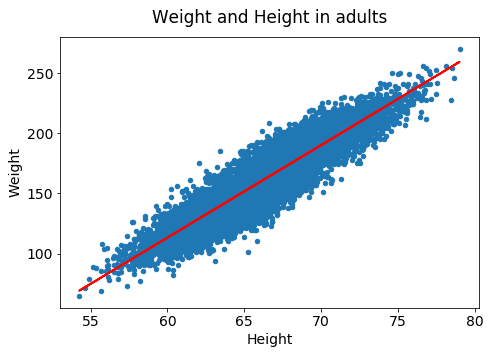

In [31]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red');

The line is not perfectly where we would have liked it to be, but it seems to have captured the relationship between `Height` and `Weight` quite well. We can inspect the parameters of the model to see what values our training decided were optimal for $b$ and $w$.

In [32]:
W, B = model.get_weights()

In [33]:
W

array([[7.686342]], dtype=float32)

In [34]:
B

array([-347.9722], dtype=float32)

Notice here that $W$ is returned as a matrix, because in the general case of a Neural Network we could have many more parameters. In this simple case of a linear regression our matrix has 1 row and 1 column and a single number for the slope of our line, so let's extract it.

In [35]:
w = W[0, 0]

B is also a vector with just one entry, so we can extract that too:

In [36]:
b = B[0]

The slope parameter $w$ has a value near `7.7`. This means that, for 1 inch increase, people are on average `7.7` pounds heavier. The $b$ parameter is roughly `-350`. This is called _offset_ or _bias_ and corresponds to the weight of an adult of zero height.

Since negative weight does not make sense, we have to be careful about how we interpret this value. Let's see if we can see what's the minimum height that makes sense in this model. This will be the height that produces a weight of zero since negative weights are nonsense. Zero weight means $y=0$, so now that we have a model we can look for the value of $X$ that corresponds to $y=0$.

Setting $y=0$ in the line equation gives:

\begin{equation}
0 = X  w + b
\end{equation}

and we can shuffle things around to obtain:

\begin{equation}
X = \frac{-b}{w}
\end{equation}

Let's calculate it:

In [37]:
-b/w

45.271496

So this model only makes sense for people who are at least about 45 inches tall. If you are shorter than 46 inches, this model predicts you'd have a negative weight, which is wrong.

### Evaluating Model Performance

Great! We have trained our **first Supervised Learning model** and have found the best combination of parameters $b$ and $w$. However, is this a good model? Can we trust it to predict the height of new people that were not part of the training data? In other words, will our model "generalize well" when offered new, unknown data? Let's see how we can answer that question.

#### $R^2$ coefficient of determination

First of all, we need to define a sort of standard score, a number that will allow us to compare the _goodness_ of a model regardless of how many data points we used. We could compare losses, but the value of the loss is ultimately arbitrary and dependent on the scale of the features, so we don't want to use that. Instead, let's use the _coefficient of determination_ $R^2$. 

This coefficient can be calculated for any model predicting continuous values (like regression), and it will give some information about the goodness of fit. In the case of regression, the $R^2$ coefficient is a measure of how well the regression model approximates the real data points. An $R^2$ of 1 indicates a regression line that perfectly fits the data.
If the line does not perfectly fit the data, the value of $R^2$ will decrease. A value of $0$ or lower indicates that the model is not a good one.

We recall here [Scikit-Learn](https://scikit-learn.org/stable/index.html), a Python package introduced in lab 1 that contains many Machine Learning algorithms and supporting functions, including the $R^2$ score. Let's calculate it for the current model.

First of all, let's import it:

In [38]:
from sklearn.metrics import r2_score

and then let's calculate it on the current predictions:

In [39]:
r = r2_score(y_true, y_pred)
print("The R2 score is {:0.3f}".format(r))

The R2 score is 0.855


>TIP: In the last command we introduced a way to define [Python format](https://pyformat.info/), to make numbers more readable. In particular, we specified the format `{:0.3f}`  The brackets and characters within them are called format fields, and they are replaced with the objects passed into the `str.format()` method. The integer after the `:` will cause that field to be a minimum number of characters wide, `0` in this case. `3` indicates the number of decimal digits and `f` stands for a floating point decimal format.

It's not too far from 1, which means our regression is not too bad. It doesn't answer the question about generalization though, how can we know if our model is going to generalize well?

### Train / Test split

Let's go back to our dataset. What if, instead of using all of it to train our model, we held out a small fraction of it, say 20% randomly sampled points. We could train the model on the remaining 80% and use the 20% to test how good the model is. This would be a good way to test if our model is **overfitting**.

_Overfitting_ means that our model is just memorizing the answers instead of learning general rules about the training examples. By withholding a test set, we can test our model on data never seen before. If it performs just as well, we can assume it will perform well on new data when deployed.

On the other hand, if our model has a good score on the training set but has a bad score on the test set, this would mean it is not able to generalize to unseen examples, and therefore it's not ready for deployment.

This is called a train/test split, it's standard practice for Supervised Learning, and there's a convenient Scikit-Learn function for it.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y_true, test_size=0.2)

In [42]:
len(X_train)

8000

In [43]:
len(X_test)

2000

Using `train_test_split`, we split the data into two sets, the `training set` and the `test set`. Now we can use each according to its name: we let the parameters of our models vary to minimize the cost over the training set and then check the cost and the $R^2$ score over the test set. If things went well, these two should be comparable, i.e., the model should perform well on new data. Let's do that!

First, let's train our model on the **training data** (notice the test data is not involved here):

In [44]:
model.fit(X_train, y_train, epochs=50, verbose=0);

Then let's calculate predictions for both the train and test sets. 

> TIP: Note that unlike training, making predictions is a "read-only" operation and does **not change** our model. We're just making predictions.

In [45]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

Let's calculate the mean squared error and the $R^2$ score for both. We will also import the `mean_squared_error` function from Scikit-Learn, which does the same calculation as the function we defined above, but it's probably better defined.

In [46]:
from sklearn.metrics import mean_squared_error as mse

In [47]:
err = mse(y_train, y_train_pred)
print("Mean Squared Error (Train set):\t",
      "{:0.1f}".format(err))

err = mse(y_test, y_test_pred)
print("Mean Squared Error (Test set):\t",
      "{:0.1f}".format(err))

Mean Squared Error (Train set):	 172.5
Mean Squared Error (Test set):	 178.0


In [48]:
r2 = r2_score(y_train, y_train_pred)
print("R2 score (Train set):\t{:0.3f}".format(r2))

r2 = r2_score(y_test, y_test_pred)
print("R2 score (Test set):\t{:0.3f}".format(r2))

R2 score (Train set):	0.831
R2 score (Test set):	0.834


It appears that both the loss and the $R^2$ score are comparable for the Train and Test set, which is great! If we had obtained values that were significantly different, we would have had a problem. Generally speaking, our test set could perform a little worse because the test data has not been seen before. If the performance on the test set is significantly lower than on the training set, we are _overfitting_.

> TIP: The test fraction does not need to be 20%. We could use 5%, 10%, 30%, 50% or anything we like. Keep in mind that if we do not use enough data for testing, we may not have a credible test of how well the model generalizes, while if we use too much testing data, we make it harder for the model to learn because it saw too few examples.

Note that this is another reason to prefer an average (i.e., divided by the total number of sample points) rather than a total loss. In this way, the loss will not depend on the size of the set used to calculate it, and we will be therefore able to compare losses obtained over datasets of different sizes.

Congratulations! We have just encountered the three basic ingredients of a Neural Network: a **hypothesis with parameters**, the **cost function** and the **optimization algorithm**.

## Classification

So far we have just learned about linear regression and how we can use it to predict a continuous target variable. We have learned about formulating a *hypothesis* that depends on *parameters* and about *optimizing a cost* to find the optimal values for such parameters.

We can apply the same framework to cases where the target variable is discrete and not continuous. All we need to do is to **adapt the hypothesis and the cost function**. 

Let's see how. Imagine we are predicting if a visitor on our website is going to buy a product, based on how many seconds he/she spent on the product page. In this case, the outcome variable is binary: the user either buys or doesn't buy the product. How can we build a model with a binary outcome? Let's load some data and find out:

In [49]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [50]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


The dataset we loaded has two columns:
- Time (min)
- Buy

and we can plot it like this:

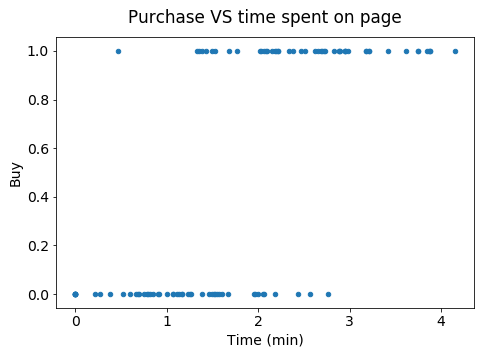

In [51]:
df.plot(kind='scatter', x='Time (min)', y='Buy',
        title='Purchase VS time spent on page');

Since the outcome variable can only assume a finite set of distinct values (only 0 and 1 in this case), this is a *classification* problem, i.e., we are looking for a model that is capable of predicting to which class a data point belongs.

> TIP: There are many algorithms to solve a classification problem, including K-nearest neighbors, decision trees, support vector machines, and Naive Bayes classifiers.

### Linear regression fail

What happens if we use the same model we have just used to fit this data? Will the model refuse to work? Will it converge? Will it give helpful predictions?

Let's try it and see what happens. First we need to define our features and target variables.

In [52]:
X = df[['Time (min)']].values
y = df['Buy'].values

Then we can use the exact same model we used before. We will simple re-initialize it by resetting the parameter $w$ to 1 and $b$ to 0:

In [53]:
model.set_weights([[[ 1.0]], [0.]])

Then we fit the model on X and y for 200 epochs, suppressing the output with `verbose=0`:

In [54]:
model.fit(X, y, epochs=200, verbose=0);

Let's see what the predictions look like:

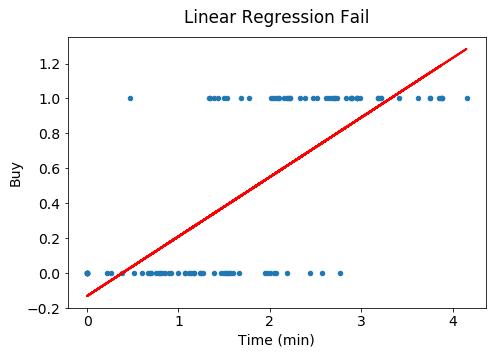

In [55]:
y_pred = model.predict(X)

df.plot(kind='scatter', x='Time (min)', y='Buy',
        title='Linear Regression Fail')
plt.plot(X, y_pred, color='red');

As you can see the linear regression it doesn't make much sense to use a straight line to predict an outcome that can only either 0 or 1. That said, the modification we need to apply to our model in order to make it work is actually quite simple.

### Logistic Regression

We will approach this problem with a method called *Logistic Regression*. Despite the name being "regression", this technique is actually useful to solve classification problems, i.e. problems where the outcome is discrete.

The linear regression technique we have just learned predicts values in the real axis for each input data point. Can we modify the form of the hypothesis so that we can **predict the probability** of an outcome? If we can do that, for each value in the input, our model would give us a value between 0 and 1. At that point, we could use $p=0.5$ as our dividing criterion and assign every point predicted with probability less than 0.5 to class 0, and every point predicted with probability more than 0.5 to class 1.

In other words, if we modify the regression hypothesis to allow for a nonlinear function between the domain of our data and the interval $[0, 1]$, we can use the same machinery to solve a classification problem.

There's one additional point we will need to address, which is how to adapt the cost function. Since our labels are only the values 0 and 1, the **Mean Squared Error is not the correct cost function to use**. We will see below how to define a cost that works in this case.

Let us first start by defining a nonlinear hypothesis. We need a nonlinear function that will map all of the real axis into the interval $[0, 1]$. There are many such functions and we will see a few in the next labs. A simple, smooth and well-behaved function is the [**Sigmoid** function](https://en.wikipedia.org/wiki/Sigmoid_function):

\begin{equation}
\sigma(z) = \frac{1}{1 + e^{-z}}
\end{equation}

which looks like this:

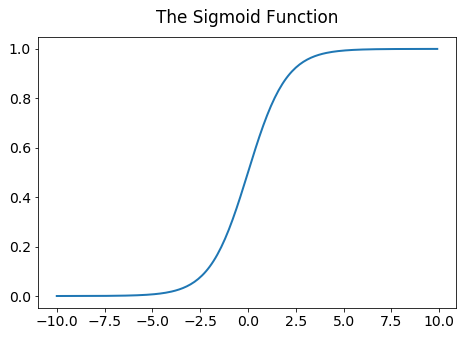

In [56]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

z = np.arange(-10, 10, 0.1)

plt.plot(z, sigmoid(z))
plt.title("The Sigmoid Function");

The Sigmoid starts at values really close to 0 for negative values of $x$. Then it gradually increases and near $x=0$ it smoothly transitions to values close to 1. Mathematically speaking, the sigmoid function is like a smooth step function.

#### Hypothesis

Using the sigmoid we can formulate the *hypothesis* for our classification problem as:

\begin{equation}
\textrm{Buy} = \frac{1}{1+e^{-(Time \; w + b)}}
\end{equation}

or

\begin{equation}
\hat{y} = \sigma(X w + b)
\end{equation}

We will encounter this function many times in this labs. It is used at the output of a Neural Network when performing a binary classification and is generally not used between layers because there are better activation functions.

Notice that we have introduced two parameters, $w$ and $b$, in our definition. One of them controls the speed of the transition between 0 and 1, while the other controls the position of the transition. Let's plot a few examples:

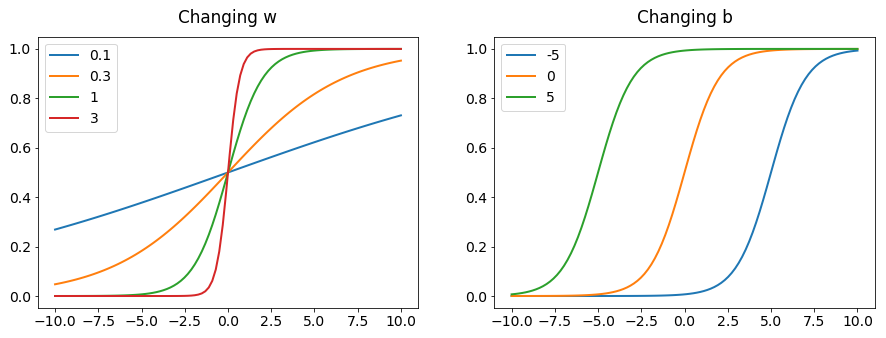

In [57]:
x = np.linspace(-10, 10, 100)

plt.figure(figsize=(15, 5))

plt.subplot(121)

ws = [0.1, 0.3, 1, 3]
for w in ws:
    plt.plot(x, sigmoid(line(x, w=w)))

plt.legend(ws)
plt.title('Changing w')

plt.subplot(122)

bs = [-5, 0, 5]
for b in bs:
    plt.plot(x, sigmoid(line(x, w=1, b=b)))

plt.legend(bs)
plt.title('Changing b');

#### Cost function

Now that we have defined the hypothesis, we need to adjust the definition of the cost function so that it makes sense for a binary classification problem. There are various options for this, similarly to the regression case, including [square loss, hinge loss and logistic loss](https://en.wikipedia.org/wiki/Loss_functions_for_classification).

As we shall see in lab 5, Deep Learning models learn by performing gradient descent minimization of the cost function, which requires the cost function to be "minimizable" in the first place. In mathematics, we say that the cost function needs to be *convex* and *differentiable*.

One of the most commonly used cost function in Deep Learning is the [cross-entropy loss](https://en.wikipedia.org/wiki/Cross_entropy).

Let's explore how it is calculated. We can define the cost for a single point as:

\begin{equation}
c_i = - y_i \log{(\hat{y}_i)} -(1 - y_i) \log{(1 - \hat{y}_i)}
\end{equation}


Notice that due to the binary nature of the outcome variable $y$, only one of the two terms is present at each time. If the label $y_i$ is 0, then $c_i = - \log{(1 - \hat{y}_i)}$, if the label $y_i$ is 1, then $c_i = - \log{(\hat{y}_i)}$.

Another way of thinking about this in programmable terms might be

\begin{equation}
c_i = \begin{cases}
- \log{(\hat{y}_i)} & \text{for }y_i = 1 \\
- \log{(1 - \hat{y}_i)} & \text{for }y_i = 0
\end{cases}
\end{equation}

Let's look at the first term first, which only contributes to the cost when $y_i = 1$. Remember that $\hat{y}$ contains the sigmoid function, so its negative logarithm is:

\begin{equation}
\log(\sigma(z)) =  - \log(1) + \log(1 + e^{-z}) = \log(1 + e^{-z})
\end{equation}

What this means is if $z$ is big, this quantity goes to zero, if $z$ is negative, this quantity goes to infinity:

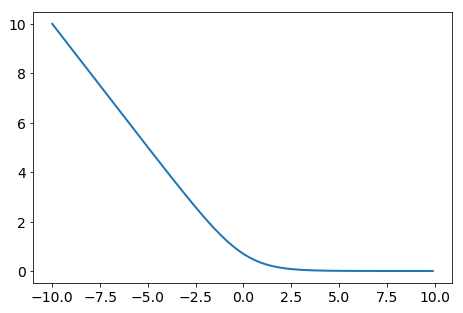

In [58]:
plt.plot(z, -np.log(sigmoid(z)));

In other words, when the label is 1 ($y = 1$), our predictions should also approach 1. Since our predictions are obtained with the sigmoid, we want $\hat{y} = \sigma(z)$ to approach 1 as well. This happens for large values of $z$. Therefore, the cost should be minimal when $z$ is large. On the other hand, if $z$ is small, the sigmoid goes to zero, and our prediction is wrong. That's why the cost becomes increasingly large for negative values of $z$.

The same logic applies to the second term for when $y = 0$: it should push $z$ to have negative values so that the sigmoid goes to zero and our prediction is correct in this case.

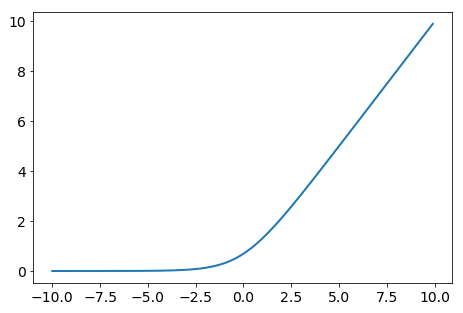

In [59]:
plt.plot(z, -np.log(1 - sigmoid(z)));

Now that we have defined the cost for a single point, we can define the average cost as:

\begin{equation}
c = \frac{1}{N} \sum_i c_i
\end{equation}

Where the index $i$ runs over a set of learning examples, also called a batch. This is the _average cross-entropy_ or _log loss_.

Now that we have defined hypothesis and cost for the logistic regression case, we can go ahead and look for the best parameters that minimize the cost, very much in the same way as we did for the linear regression case.

#### Generalization to many classes

In [Lab 4](./04_Deep_Learning.ipynb#Multiclass-classification) we discuss the multi-class classification in further detail. Here we observe that there are 2 ways to generalize the binary cross-entropy to multiple classes.

1. If the classes are not mutually exclusive, then we treat them as independent predictions and each of them is scored with a binary crossentropy like in the binary case.
2. If the classes are mutually exclusive, we need to consider the predictions as joint. Since our model predicts the probability to be in a class amongst many, the predicted probabilities need to add up to 1. In this case we will use a [Softmax](./04_Deep_Learning.ipynb#Mutually-exclusive-classes-and-Softmax) function at the output, and a _Categorical Cross-entropy_, which, for a single data point, has the formula:


\begin{equation}
c_i = \sum_{j \in \text{labels}} y_{ij} \log{(\hat{y}_{ij})} 
\end{equation}

where the index $i$ indicates the particular data point and label we are using, while the index $j$ runs over the classes.

#### Logistic regression in Keras

First, let's define a model in Keras. As we have seen above, `Dense(1, input_shape=(1,))` implements a linear function with one input and one output. The only change we need to perform is to add a _sigmoid_ function that takes the output variable and maps it to the interval [0, 1]. In a way, it's as if we were *"wrapping"* the Dense layer with the sigmoid function.

Let's first create a model like we did for the linear regression:

In [60]:
model = Sequential()
model.add(Dense(1, input_dim=1))

We can add the activation as a layer:

In [61]:
from tensorflow.keras.layers import Activation

In [62]:
model.add(Activation('sigmoid'))

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


As you can see the model has two parameters, a weight and a bias, and it has a sigmoid activation function as a second layer. We can convince ourselves that it's a sigmoid by using the model to predict values for a few $z$ values:

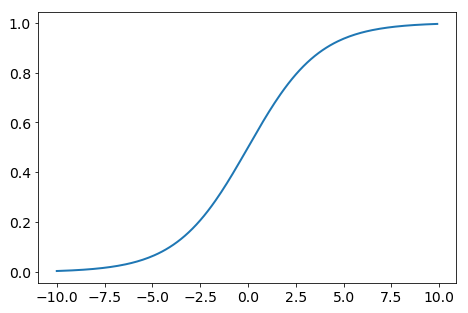

In [64]:
plt.plot(z, model.predict(z));

Also notice that the weights in the model are initialized randomly, so your sigmoid may look different from the one in the figure above.

> TIP: Keras allows a more compact model specification by including the activation function in the Dense layer definition. We can define the same model above by:
>
```python
model.add(Dense(1, input_dim=1, activation='sigmoid'))
```

The next step is to compile the model like we did before to specify the cost function and the optimizer. Keras offers [several cost functions for classification](https://keras.io/losses/). The cross-entropy for the binary classification case is called `binary_crossentropy` so we will use this one now: 

In [65]:
model.compile(optimizer=SGD(lr=0.5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Accuracy

Notice that this time we also included an additional metric at compile time: *accuracy*. [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) is one of the possible scores we can use to judge the quality of a classification model. It tells us what fraction of samples are predicted in the correct class, so for example an accuracy of `80%` or `0.8` means that 80 samples out of 100 are predicted correctly.

Let's train this new model on our data.

In [66]:
model.fit(X, y, epochs=25);

Epoch 1/25
100/100 [==============================] - 0s 1ms/sample - loss: 0.6192 - accuracy: 0.5800
Epoch 2/25
100/100 [==============================] - 0s 90us/sample - loss: 0.5738 - accuracy: 0.6500
Epoch 3/25
100/100 [==============================] - 0s 87us/sample - loss: 0.5600 - accuracy: 0.7400
Epoch 4/25
100/100 [==============================] - 0s 89us/sample - loss: 0.5413 - accuracy: 0.8200
Epoch 5/25
100/100 [==============================] - 0s 88us/sample - loss: 0.5198 - accuracy: 0.7300
Epoch 6/25
100/100 [==============================] - 0s 88us/sample - loss: 0.5227 - accuracy: 0.7000
Epoch 7/25
100/100 [==============================] - 0s 87us/sample - loss: 0.4871 - accuracy: 0.8200
Epoch 8/25
100/100 [==============================] - 0s 88us/sample - loss: 0.4771 - accuracy: 0.8000
Epoch 9/25
100/100 [==============================] - 0s 89us/sample - loss: 0.4664 - accuracy: 0.8200
Epoch 10/25
100/100 [==============================] - 0s 88us/sample - lo

The model seems to have converged because the loss does not seem to improve in the last epochs. Let's see what the predictions look like:

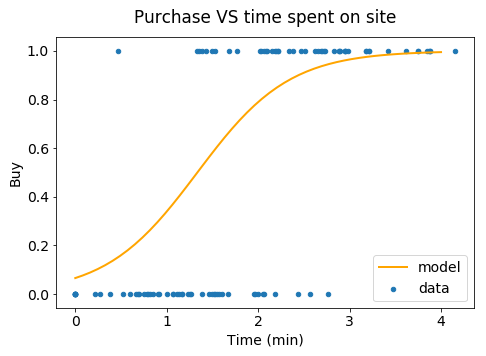

In [67]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data']);

Great! The two parameters in our logistic regression have been tuned to best reproduce our data.

Notice that the logistic regression model predicts a probability. If we want to convert this to a binary prediction we need to set a threshold. For example we could say that all points predicted to be 1 with $p>0.5$ are set to 1 and the others are set to 0.

In [68]:
y_pred = model.predict(X)

In [69]:
y_class_pred = y_pred > 0.5

With this definition we can calculate the accuracy of our model as the number of correct predictions over the total number of points. Scikit-learn offers a ready to use function for this behavior called `accuracy_score`:

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
acc = accuracy_score(y, y_class_pred)
print("Accuracy score: {:0.3f}".format(acc))

Accuracy score: 0.800


### Train/Test split

We can repeat the above steps using train/test split. Remember, we're aiming for similar accuracies in the train and test sets:

In [72]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2)

We need to reset the model, or it will retain the previous training. How do we do that? Our model only has 2 parameters, $w$ and $b$, so we can just reset these two parameters to zero.

In [73]:
params = model.get_weights()

In [74]:
params

[array([[1.9897382]], dtype=float32), array([-2.6567478], dtype=float32)]

In [75]:
params = [np.zeros(w.shape) for w in params]

In [76]:
params

[array([[0.]]), array([0.])]

In [77]:
model.set_weights(params)

Let's check that the model is now predicting garbage:

In [78]:
acc = accuracy_score(y, model.predict(X) > 0.5)
print("The accuracy score is {:0.3f}".format(acc))

The accuracy score is 0.500


And in fact the model is now a straight line at 0.5:

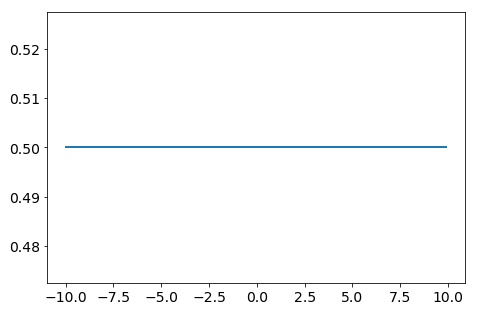

In [79]:
plt.plot(z, model.predict(z));

Let's re-train it on the training data only

In [80]:
model.fit(X_train, y_train, epochs=25, verbose=0);

And let's check the accuracy score on training and test sets:

In [81]:
y_pred_train_class = model.predict(X_train) > 0.5
acc = accuracy_score(y_train, y_pred_train_class)
print("Train accuracy score {:0.3f}".format(acc))

y_pred_test_class = model.predict(X_test) > 0.5
acc = accuracy_score(y_test, y_pred_test_class)
print("Test accuracy score {:0.3f}".format(acc))

Train accuracy score 0.850
Test accuracy score 0.750


So, in this case the model is performing as well on the test set as on the training set. Good!

## Overfitting

We are advancing quickly! This table recaps what we have learned so far:

| Target Variable | Method | Hypothesis | Cost Function |
|:-|:-:|:-:|:-:|
|Continuous|Linear Regression| $\hat{y}$ = X.w + b | Mean squared Error|
|Discrete|Logistic Regression| $\hat{y}$ = sigmoid(X.w + b) | Cross Entropy Error|

Notice we have extended the models to datasets with multiple features using the vector notation:

\begin{equation}
X.w = x_{j0} w_0 + x_{j1} w_1 + x_{j2} w_2 + .... = \sum_i x_{ji} w_i \textrm{ for each data point j}
\end{equation}

In this case, $w$ is a weight vector of size $M$, where $M$ is the number of features, while $X$ is a matrix of size $NxM$, where $N$ is the number of records in our dataset.

We have also learned to split our data into two parts: a training set and a test set.

Now let's: **overfitting**. It is a common pitfall in machine learning, and you need to know how to find it and how to address it.

[Overfitting](https://en.wikipedia.org/wiki/Overfitting) happens when our model learns the probability distribution of the training set too well and is not able to generalize to the test set with the same performance. Think of this as learning things by heart without really understanding them, in a new situation you will be lost and probably underperform.

![Overfitting in a classification problem](./assets/overfitting_classification.png)

A straightforward way to check for overfitting is to compare the cost and the performance metrics of the training and test set. For example, let's say we are solving a classification problem and we measure the number of correct predictions, aka the accuracy, to be 99% for the training set and only 85% for the test set. This means our model is not performing as well on the test set and we are therefore overfitting.

It is going to be very hard to overfit with a simple model with only one parameter, but as the number of parameters increases, the likelihood of overfitting increases as well. We'll need to watch out for our model _overfitting_ the dataset.

### How to avoid overfitting

There are several actions we can take to minimize the risk of overfitting.

The first simple check is to make sure that we performed our train/test split correctly and both the train and test sets are representative of the whole population of features and labels. Common errors include:

- Not preserving the ratio of labels.
- Not randomly sampling the dataset.
- Using a too small test set.
- Using a too small train set.

If the train/test split seems correct, it could be the case that our model has too much "freedom" and therefore learns by heart the training set. This is usually the case if the number of parameters in the model is comparable to or greater than the number of data points in the training set. To mitigate this, we can either reduce the complexity of the model or use regularization, as we shall see later on in the labs.

## Cross-Validation

Is a train/test split the most efficient way to use our dataset? Even if we took great care in randomly splitting our data, that's only one of many possible ways to perform a split. What if we performed several different train/test splits, checked the test score in each of them and finally averaged the scores?
Not only we would have a more precise estimation of the real accuracy, but also we could calculate the standard deviation of the scores and therefore know the error on the accuracy itself.

This procedure is called cross-validation. There are many ways to perform cross-validation. The most common is called **K-fold cross-validation**.

![Cross Validation](./assets/cross_validation.png)

In [K-fold cross validation](https://en.wikipedia.org/wiki/Cross-validation_%28statistics%29) the whole dataset is split into $K$ equally sized random subsets. Then, each of the $K$ subsets gets to play the role of the test set, while the others are aggregated back to form a training set. In this way, we obtain $K$ estimations of the model score, each calculated from a test set that does not overlap with any of the other test sets.

Not only do we get a better estimate of the validation score, including its standard deviation, but we also used each data point more efficiently, since each data point gets to play the role of both train and test.

These advantages do not come for free. We had to train the model $K$ times, which takes longer and consumes more resources than training it just one time. On the other hand, we can parallelize the training over each fold, either by distributing them across processes or different machines.

Scikit-Learn offers [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) out of the box, but we'll have to wrap our model in a way that can be understood by Scikit-Learn. This is easy to do using a wrapper class called `KerasClassifier`.

In [82]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [83]:
def build_logistic_regr():
    model = Sequential()
    model.add(Dense(1, input_dim=1, 
                    activation='sigmoid'))

    model.compile(optimizer=SGD(lr=0.5), 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [84]:
model = KerasClassifier(build_fn=build_logistic_regr,
                        epochs=25, verbose=0)

We've just redefined the same model, but in a format that is compatible with Scikit-Learn. Let's calculate the cross validation score on a 3-fold (it means $K=3$) cross validation:

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [86]:
cv = KFold(3, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

In [87]:
scores

array([0.85294116, 0.69696969, 0.78787881])

The cross validation produced 3 scores, 1 for each fold. We can average them and take their standard deviation as a better estimation of our accuracy:

In [88]:
m = scores.mean()
s = scores.std()
print("Cross Validation accuracy:",
      "{:0.4f} ± {:0.4f}".format(m, s))

Cross Validation accuracy: 0.7793 ± 0.0640


There are also other ways to perform a cross validation. Here we mention a few.

**Stratified K-fold** is similar to K-fold, but it makes sure that the proportions of labels are preserved in the folds. For example, if we are performing a binary classification and 40% of the data is labeled True, and 60% is labeled False, each of the folds will also contain 40% True labels and 60% False labels.

We can also perform cross-validation by randomly selecting a test set of fixed size multiple times. In this case, we do not need to make sure that the test sets are disjoint and they will overlap in some points.

Finally, it is worth mentioning **Leave-One-Group-Out** cross-validation or **LOGO**. LOGO is useful when our data is stratified in subgroups. For example, imagine we are building a model to recognize gestures from phone accelerometer data. Our training dataset probably contains multiple recordings of different gestures from different users. The labels we are trying to predict are the gestures.

By performing cross-validation both our training and test sets would leave us with sets which contain recordings from all users. If we train the model in this way, we could very well end up with a good test score, but we would have no idea about how the model would perform if a **new user** executed the same gestures. In other words, the model could be overfitting over each user, and we would have no way of knowing it.

In this case, it is better to split the data relative to the users, using **all of the data** from some of them as training, while testing on **all of the data** from the remaining users. If the test score is good in this case, we can be fairly sure that the model will perform well with a new user.

## Confusion Matrix

Is **accuracy** the best way to check the performance of our model? It surely tells us how well we are doing overall, but it doesn't give us any insight into the kind of errors the model is doing. Let's see how we can do better.

In the problem we just introduced, we are estimating the purchase probability from the time spent on a page. This is a binary classification, and we can be either right or wrong in the four ways represented here:

![Confusion Matrix](./assets/confusion_matrix.png)

This table is called **confusion matrix** and it gives a better view of correct and wrong predictions.

Let's look at the four cases one at a time. We could be right in predicting the purchase or right in predicting the absence of a purchase. These are the **True Positives** and **True Negatives**. Summed together they amount to the number of correct predictions we formulated. If we divide this number by the total number of data points, we obtain the **Accuracy** of the model. In other words, accuracy is the overall ratio of correct predictions:

\begin{equation}
\textrm{Acc} = \frac{(\textrm{TP} + \textrm{TN})}{\textrm{All}}
\end{equation}


On the other hand, our model could be wrong in two ways.

1. It could predict that a person buys when they are not buying: this is a **False Positive**.

2. It could predict that a person does not buy when they are buying: this is a **False Negative**.

Let's use Scikit-Learn to calculate the confusion matrix of our data:

In [89]:
from sklearn.metrics import confusion_matrix

We define a short helper function to add column and row labels for nice display:

In [90]:
def pretty_cm(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]

    df = pd.DataFrame(cm,
                      index=labels,
                      columns=pred_labels)
    return df

In [91]:
pretty_cm(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,32,18
Buy,2,48


Let's stop here for a second. Let's say that, if the model was predicting True, the user is offered to buy an additional product at a discount. On which side would you rather the model be wrong? Would you like the model to offer a discount to users with no intention of buying (False Positive) or would you rather it not offer a discounted additional item to users who intend to buy (False Negative)?

What if, instead of predicting the purchase behavior from time spent on a page we were determining the likelihood to have cancer, based on the value of a blood screening exam? Would you want a False Positive or a False Negative in that case?

Most people would prefer a False Positive, and do an additional screening to make sure of the result, rather than go home feeling safe and healthy while they are not. Would that be your choice too?

What if you were an (evil) health insurance company instead? Would you still choose to optimize the model in the same way? A False Positive would be an additional cost to you because the patient would go on to see a specialist. Would you prefer to minimize False Positives in this case?

As you can see, there is no one correct answer. Different stakeholders will make different choices. This is to say that the data scientist is not a neutral observer of a Machine Learning process. The decisions he/she makes, fundamentally determine the outcome of the training!

False Positives and False Negatives are usually expressed in terms of two sister quantities: Precision and Recall. Here they are:

### Precision

We define precision as the ratio of True Positives to the total number of positive tests:

\begin{equation}
\textrm{Precision} = \frac{(\textrm{TP})}{\textrm{TP} + \textrm{FP}}
\end{equation}

Precision $P$ will tend towards 1 when the number of False Positives goes to zero, i.e. when we do not create any false alerts and are thus, "precise". Here on every positive case we are correct.

### Recall

On the other hand, recall is defined as the ratio of True Positives to the total number of actually positive cases:

\begin{equation}
\textrm{Recall} = \frac{(\textrm{TP})}{\textrm{TP} + \textrm{FN}}
\end{equation}

Recall $R$ will tend towards 1 when the number of False Negatives goes to zero, i.e. when we do not miss many of the positive cases or we "recall" all of them.

### F1 Score

Finally, we can combine the two in what's called F1-score:

\begin{equation}
F1 = 2 \frac{PR}{P + R}
\end{equation}

$F1$ will be close to 1 if both precision and recall are close to 1, while it will go to zero if either of them is low. In this sense, the F1 score is an excellent way to make sure that both precision and recall are high.

The $F1$ score is a [harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean) of precision and recall. The harmonic mean is an average for ratios. There are also other F-scores that give more weight to precision or to recall more, called F-beta scores. You can read about them on [Wikipedia](https://en.wikipedia.org/wiki/F1_score) and [Scikit-Learn doc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html).

Let's evaluate these scores for our data:

In [92]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [93]:
precision = precision_score(y, y_class_pred)
print("Precision:\t{:0.3f}".format(precision))

recall = recall_score(y, y_class_pred)
print("Recall:  \t{:0.3f}".format(recall))

f1 = f1_score(y, y_class_pred)
print("F1 Score:\t{:0.3f}".format(f1))

Precision:	0.727
Recall:  	0.960
F1 Score:	0.828


Scikit-Learn offers a handy `classification_report` function that combines all these:

In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.94      0.64      0.76        50
           1       0.73      0.96      0.83        50

   micro avg       0.80      0.80      0.80       100
   macro avg       0.83      0.80      0.79       100
weighted avg       0.83      0.80      0.79       100



**support** here means how many point were present in each class.

While these definitions hold true only for the binary classification case, we can still extend the confusion matrix to the case where there are more than 2 classes.

![Multi-class Confusion Matrix](./assets/multi_class_cm.png)

In this case, the element $i$,$j$ of the matrix will tell us how many data points in class $i$ have been predicted to be in class $j$. This is very powerful to see if any of the classes are being confused. If so we can isolate the data being misclassified and try to understand why.

## Feature Preprocessing

### Categorical Features

Sometimes input data will be categorical, i.e., the feature values will be discrete classes instead of continuous numbers. For example, in the weight/height dataset above, there's a 3rd column called `Gender` which can either be `Male` or `Female`. How can we convert this categorical data to numbers that can be consumed by our model? 

There are several ways to do it, the most common being **One-Hot** or **Dummy** encoding. In Dummy encoding, we substitute the categorical column with a set of boolean columns, one for each category present in the column. In the Male/Female example above, we would replace the `Gender` column with two columns called `Gender_Male` and `Gender_Female` that would have binary values. Pandas offers a quick way to do that:

In [96]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Here's how to create the dummy columns:

In [97]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In this particular case, we only need one of the two columns, since we only have two classes, but if we had 3 or more categories, then we would need to pass all the dummy columns to our model.

There are other ways to encode categorical features, including **index encoding**, **hashing trick** and **embeddings**. We will learn more about these later in the labs.

### Feature Transformations

As we will see in the exercises, Neural Network models are quite sensitive to the absolute size of the input features. Passing features with very large or small values will not help them converge to a solution. An easy way to overcome this problem is to normalize the features to a number near 1.

Here are a few methods we can use to transform our features.

#### 1) Rescale with fixed factor

We could change the unit of measurement. For example, in the Humans example we could rescale the height by 12 (go from inches to feet) and the weight by 100 (go from pounds to 100 pounds):

In [98]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [99]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [100]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


As you can see our new features have values that are close to 1 in order of magnitude, which is good enough.

#### 2) MinMax normalization

A second way to normalize features is to take the minimum value and the maximum value and rescale all values to the interval (0,1). This can be done using the `MinMaxScaler` provided by `sklearn` like so:

In [101]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


Our new features have a maximum value of 1 and a minimum value of 0, exactly as we wanted them.

#### 3) Standard normalization

A third way to normalize large or small features is to subtract the mean and divide by the standard deviation. 

In [102]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


After standard normalization, our new features have approximately zero mean and standard deviation of 1. This is good in a linear model, because each feature is multiplied by a weight that the model has to find. Since the weights are initialized to have values near 1, if the feature had a very large or very small scale, the model could have to adjust the value of the weight enormously, just to account for the different scale. It is therefore good practice to normalize our features before giving them to a Neural Network.

Note that we have just rescaled the units of our features, but their distribution is the same:

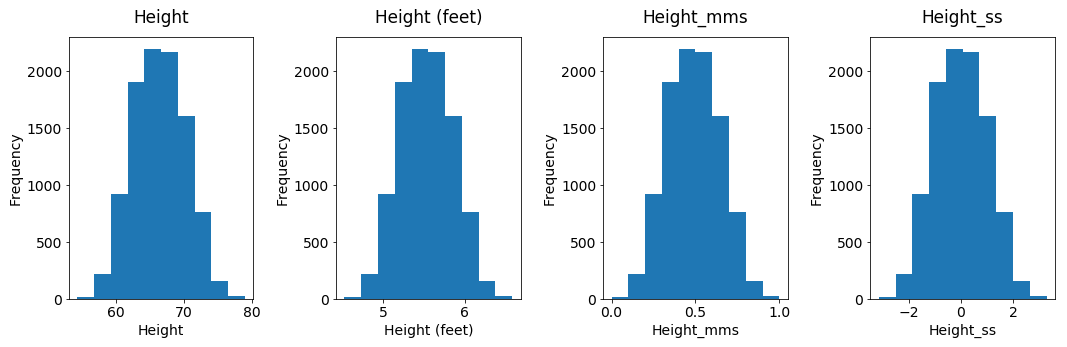

In [103]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height',
                             'Height (feet)',
                             'Height_mms',
                             'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

plt.tight_layout();

Now the time has come to apply what you've learned with some exercises.

## Exercises

### Exercise 1

You just started working at a real estate investment firm, and they would like you to build a model for pricing houses. You receive a dataset that contains data for house prices and a few features like "number of bedrooms", "size in square feet" and "age of the house". Let's see if you can build a model that can predict the price. In this exercise, we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. load the dataset `../data/housing-data.csv`
- plot the histograms for each feature
- create two variables called `X` and `y`: `X` shall be a matrix with three columns (sqft, bdrms, age) and `y` shall be a vector with one column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with the training, check the $R^2$ on the test set

### Exercise 2

Your boss was delighted with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen many people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees, and they would like you to build a model that can predict which employee will leave next. They would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last five years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stays?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision, and recall
- check if you still get the same results if you use 5-Fold cross-validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, this logistic regression model is not good enough to help your boss. In the next lab, we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).